In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

In [8]:
# # np.random.seed(19680801)
boxsize = 16
Z = np.random.randint(0, 2, (boxsize, boxsize))
x = np.arange(0, boxsize, 1)
y = np.arange(0, boxsize, 1)

# fig = plt.figure(num = "field", figsize=(3,3), dpi = 150)
# # fig, ax = plt.subplots()
# plt.pcolormesh(x, y, Z)

In [9]:
!pip install chart_studio
!pip install geomdl

In [11]:
!conda install networkx

Solving environment: done

# All requested packages already installed.



In [12]:
import networkx as nx
G=nx.Graph()

# https://habr.com/ru/post/537630/

boxsize = 16


fig = plt.figure(num = "field2", figsize=(3,3), dpi = 150)

Z = np.zeros((boxsize, boxsize))

# Z[np.random.randint(2)][np.random.randint(2)]
cp = np.random.randint(boxsize / 2., size= 2)
cp = [cp[0] * 2, cp[1] * 2]
# Z[cp[0]][cp[1]] = 1

def color(Z, ci):
  Z[ci[0]][ci[1]] = 1

def xytoname(ci):
  return ci[0] * boxsize + ci[1]

def connect_to_existing(Z, cp):
  offsets_double = [[-2, 0], [2, 0], [0, -2], [0, 2]]
  offsets = [[-1, 0], [1, 0], [0, -1], [0, 1]]
  while 1:
    id = np.random.randint(4)
    if cp[0] + offsets_double[id][0] >= 0 and cp[0] + offsets_double[id][0] < boxsize \
    and cp[1] + offsets_double[id][1] >= 0 and cp[1] + offsets_double[id][1] < boxsize:
      if Z[cp[0] + offsets_double[id][0]][cp[1] + offsets_double[id][1]] == 1:
        color(Z, [cp[0] + offsets[id][0], cp[1] + offsets[id][1]])
        p1 = xytoname(cp)
        p2 = xytoname([cp[0] + offsets[id][0], cp[1] + offsets[id][1]])
        p3 = xytoname([cp[0] + offsets_double[id][0], cp[1] + offsets_double[id][1]])
        G.add_node(p1, pos = cp)
        G.add_node(p2, pos = [cp[0] + offsets[id][0], cp[1] + offsets[id][1]])
        G.add_node(p3, pos = [cp[0] + offsets_double[id][0], cp[1] + offsets_double[id][1]])

        G.add_edge(p1, p2, weight = 1.)
        G.add_edge(p2, p3, weight = 1.)
        # G.add_edge((cp[0] * boxsize + cp[1]), \
        #            (cp[0] + offsets[id][0]) * boxsize + (cp[1] + offsets[id][1]), weight=0.9)
        # G.add_edge(((cp[0] + offsets[id][0]) * boxsize + (cp[1] + offsets[id][1])), \
        #            ((cp[0] + offsets_double[id][0]) * boxsize + (cp[1] + offsets[id][1])), weight=0.9)
        # print(id)
        return
  return

def add_valid(Z, cp, active_set = []):
  offsets_double = [[-2, 0], [2, 0], [0, -2], [0, 2]]
  for off in offsets_double:
    if cp[0] + off[0] >= 0 and cp[0] + off[0] < boxsize \
    and cp[1] + off[1] >= 0 and cp[1] + off[1] < boxsize:
      if Z[cp[0] + off[0]][cp[1] + off[1]] == 0:
        active_set.append([cp[0] + off[0], cp[1] + off[1]])
  return active_set

color(Z, cp)
active_set = add_valid(Z, cp)

while len(active_set) > 0:
  id = np.random.randint(len(active_set))
  cp = active_set.pop(id)
  if Z[cp[0]][cp[1]] == 1:
      continue

  color(Z, cp)
  connect_to_existing(Z, cp)
  connect_to_existing(Z, cp)

  active_set = add_valid(Z, cp, active_set)

plt.pcolormesh(x, y, Z, alpha=0.4)

ModuleNotFoundError: No module named 'networkx'

In [ ]:
# generate graph with walls,
# repeat previous cells process
# apply offset of 1/2 cell width to fit with regions

# or add offcet to existing parts

# use for accept reject only??? or not???

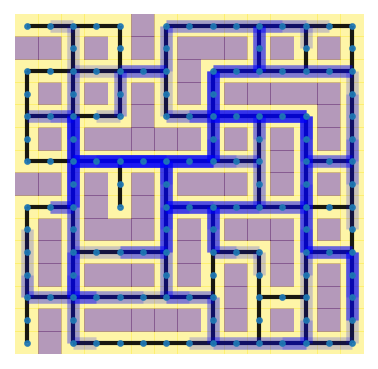

In [ ]:
# from networkx.drawing.nx_pydot import write_dot
# from scipy.interpolate import Rbf

# pos = nx.nx_agraph.graphviz_layout(G)
# pos=nx.spring_layout(G)
# print(G.nodes.data)

# nx.draw_networkx_edges(G, pos=nx.spring_layout(G))

dd = dict(G.nodes.data())

nodes = G.nodes()
# print(nodes)

pos = {i : dd[i]['pos'] for i in list(dd.keys()) }


# ids = np.random.randint(0, len(nodes), 10)
# print(len(nodes), ids)
# print("traj", traj)
# nx.dijkstra_path()

fig = plt.figure(num = "field3", figsize=(3,3), dpi = 150)

# x = np.arange(boxsize, 0, -1)
# y = np.arange(boxsize, 0, -1)
x = np.arange(-0.5, boxsize - 0.5, 1)
y = np.arange(-0.5, boxsize - 0.5, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.4)


nx.draw(G, pos=pos, alpha=0.9, node_size=5, width=2)

datasetgt = []

# generate trajectories between random points (a, b) using dijkstra algorithm
for i in range(40):
  ids = np.take(nodes, np.random.randint(len(nodes), size = 2))
  traj = nx.dijkstra_path(G, ids[0], ids[1])
  coords = np.array([pos[ti] for ti in traj])
  # print(coords)
  datasetgt.append(coords)
  H = G.subgraph(traj)
  nx.draw_networkx_edges(H, pos = pos, edge_color='b', width = 6, alpha=0.2)

plt.show()
# nx.write_dot(G, '/content/file.dot')

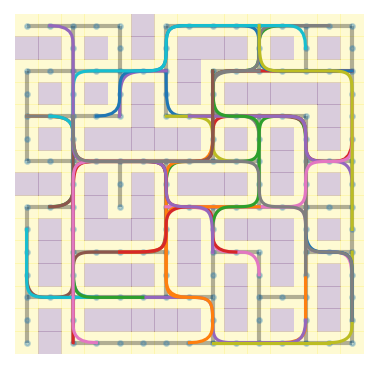

In [ ]:
import geomdl
from geomdl import BSpline
from geomdl import utilities

fig = plt.figure(num = "field3", figsize=(3,3), dpi = 150)

x = np.arange(-0.5, boxsize - 0.5, 1)
y = np.arange(-0.5, boxsize - 0.5, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.2)
nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=2)

trajs = datasetgt

for tr in trajs:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3

    x = np.array(5 + 2 * np.random.randn(4, 2))
    # print(tr)
    # curve.ctrlpts = x.tolist()
    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    # curve.delta = 0.01
    pts = np.array(curve.evalpts)
    # plt.scatter
    plt.plot(pts[:, 0], pts[:, 1])


(39, 2, 100)


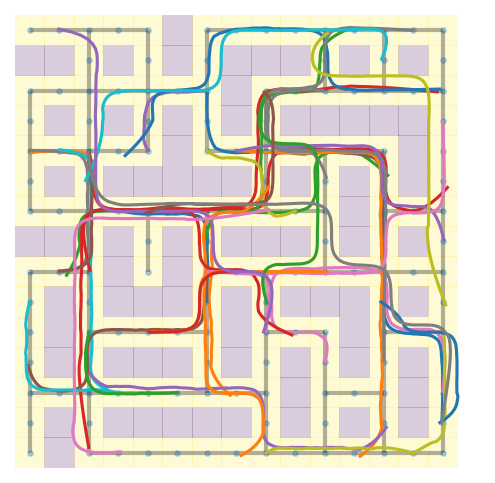

In [ ]:
from scipy.signal import savgol_filter

fig = plt.figure(num = "field3", figsize=(4, 4), dpi = 150)

x = np.arange(-0.5, boxsize - 0.5, 1)
y = np.arange(-0.5, boxsize - 0.5, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.2)
nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=2)

trajs = datasetgt

trueground = []

for tr in trajs[:-10]:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3
    # curve.delta = 0.01

    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    pts = np.array(curve.evalpts)

    eps = 0.22
    
    for i in range(4):
      dx = 0.1 / (1 + np.random.randint(3))
      offsets = [[-dx, -dx], [-dx, 0], [-dx, dx], [0, -dx], [0, 0], [0, dx], [dx, -dx], [dx, 0], [dx, dx]]

      # rot eff [-y x]
      diff = pts[3:-3,:] - pts[2:-4,:]
      rotdiff = np.array([-diff[:, 1], diff[:, 0] ]).T
      # print(rotdiff)
      off = offsets[np.random.randint(len(offsets))]
      pts[3:-3,:]  = pts[3:-3,:] + off + eps * rotdiff * np.random.randn(pts.shape[0] - 6, pts.shape[1])
      # plt.plot(pts[:, 0], pts[:, 1], alpha = 0.6, label = "noisy")
      wlen = 15
      xf = savgol_filter(pts[:, 0], wlen, 2)
      yf = savgol_filter(pts[:, 1], wlen, 2)

    trueground.append(np.array([xf, yf]))

    plt.plot(xf, yf, label = "savgol_filter")

    # todo crop trajectories if they are out of window / out of corridor
for tr in trajs[-10:]:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3

    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    pts = np.array(curve.evalpts)

    eps = 0.09
    
    for i in range(4):
      dx = 0.12
      offsets = [[-dx, -dx], [-dx, dx], [dx, -dx],[dx, dx]]

      # rot eff [-y x]
      diff = pts[3:-3,:] - pts[2:-4,:]
      rotdiff = np.array([-diff[:, 1], diff[:, 0] ]).T
      # print(rotdiff)
      off = offsets[np.random.randint(len(offsets))]
      pts[3:-3,:]  = pts[3:-3,:] + off + eps * rotdiff * np.random.randn(pts.shape[0] - 6, pts.shape[1])
      # plt.plot(pts[:, 0], pts[:, 1], alpha = 0.6, label = "noisy")
      wlen = 15
      xf = savgol_filter(pts[:, 0], wlen, 3)
      yf = savgol_filter(pts[:, 1], wlen, 3)

    trueground.append(np.array([xf, yf]))

    plt.plot(xf, yf, label = "savgol_filter")
# plt.legend()

trueground = np.array(trueground)
print(trueground.shape)

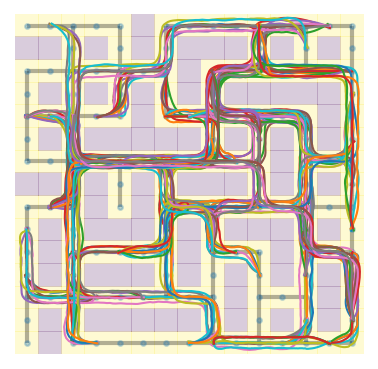

In [ ]:

fig = plt.figure(num = "field3", figsize=(3, 3), dpi = 150)

x = np.arange(-0.5, boxsize - 0.5, 1)
y = np.arange(-0.5, boxsize - 0.5, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.2)
nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=2)
trajs = datasetgt

trueground = []

dx = 0.12

def transform_trajectory(traj, eps, offsets, repeat = 1, multiply = 1, filter = [15, 2], trueground = []):
  res_pts = []
  for i in range(multiply):
    pts = np.copy(traj)

    off = offsets[np.random.randint(len(offsets))]

    for j in range(repeat):
      # trajectory direction estimation
      diff = pts[3:-3,:] - pts[2:-4,:]
      # orthogonal noise
      rotdiff = np.array([-diff[:, 1], diff[:, 0] ]).T
      pts[3:-3,:]  = pts[3:-3,:] + off + eps * rotdiff * np.random.randn(pts.shape[0] - 6, pts.shape[1])
      xf = savgol_filter(pts[:, 0], filter[0], filter[1])
      yf = savgol_filter(pts[:, 1], filter[0], filter[1])
    res_pts.append([xf, yf])
    trueground.append(np.array([xf, yf]))
  return res_pts


ds = []

for tr in trajs[:]:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3
    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    pts = np.array(curve.evalpts)
    eps = 0.24
    dx = 0.04
    offsets = [[-dx, -dx], [-dx, 0], [-dx, dx], [0, -dx], [0, 0], [0, dx], [dx, -dx], [dx, 0], [dx, dx]]

    res_pts = transform_trajectory(traj = pts, eps = 0.22, offsets = offsets, repeat = 6, multiply = 6, filter = [15, 3], trueground = trueground)
    ds.append(res_pts)
    
    for xf, yf in res_pts:
      plt.plot(xf, yf, label = "savgol_filter", linewidth = 1)


In [ ]:
# from scipy import interpolate

# x = np.arange(-5.01, 5.01, 0.25)

# # y = np.arange(-5.01, 5.01, 0.25)
# y = np.array([-1., 1.])

# xx, yy = np.meshgrid(x, y)

# # print(xx.shape, yy.shape)

# z = np.random.randn(xx.shape[0], xx.shape[1])
# plt.plot(x, y)

# # print(x.shape, y.shape, z.shape)
# # z = np.sin(xx**2+yy**2)

# f = interpolate.interp2d(x, y, z, kind='cubic')

# xnew = np.arange(-5.01, 5.01, 1e-2)
# ynew = np.arange(-1., 1., 1e-2)
# xx, yy = np.meshgrid(xnew, ynew)
# znew = f(xx, yy)
# plt.imshow(znew)
# # plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')


# plt.show()

In [ ]:
xnew_edges, ynew_edges = np.mgrid[-1:1:71j, -1:1:71j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.

tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

TypeError: ignored

In [ ]:
fig = plt.figure(num = "walls", figsize=(4, 4), dpi = 150)
plt.pcolormesh(x, y, Z.T)

# W = nx.Graph()
W2 = nx.Graph()

# def check_is_on_border(Z, cp):


# wall_pts = []

for i in range(boxsize - 1):
  for j in range(boxsize - 1):
    if Z[i][j] == 0:
      # wall_pts.append([i, j])
      # W.add_node(xytoname([i, j]), pos = [i, j])

      if i == 0 or Z[i-1][j] == 1:
        if j == 0 or Z[i][j - 1] == 1:
          W2.add_node(xytoname([i, j]), posw = [i - 0.5, j - 0.5])
          p1 = xytoname([i, j])
        else: 
          p1 = xytoname([i, j - 1])
        W2.add_node(xytoname([i, j + 0.1]), posw = [i - 0.5, j + 0.5])
        p2 = xytoname([i, j + 0.1])

        # print(p1, p2)
        # W2.add_node(xytoname([i, j + 0.2]), pos = [i + 0.5, j + 0.5])
        # W2.add_node(xytoname([i, j + 0.3]), pos = [i + 0.5, j - 0.5])
        W2.add_edge(p1, p2)


#   W2.add_node(xytoname([i, j]), pos = [i - 0.5, j - 0.5])
#   # left bottom corner / wall
#   if j == 0 or Z[i][j + 1] == 1:
#     W2.add_node(xytoname([i, j+0.2]), pos = [i - 0.5, j + 0.5])
# else:
# if j == boxsize - 2 or Z[i][j + 1] == 1:
#   # left bottom corner
#   W2.add_node(xytoname([i, j + 0.2]), pos = [i - 0.5, j + 0.5])
# if j == boxsize - 2 or Z[i][j + 1] == 1:
#   # right side
#   W2.add_node(xytoname([i, j + 0.4]), pos = [i + 0.5, j + 0.5])
# if i == boxsize - 2 or Z[i + 1][j] == 1:
#   # bottom side
#   if j != boxsize - 2 and Z[i][j + 1] == 0:
#     W2.add_node(xytoname([i, j + 0.6]), pos = [i + 0.5, j + 0.5])
#   if j == 0 or Z[i][j - 1] == 1:
#     W2.add_node(xytoname([i, j]), pos = [i + 0.5, j - 0.5])

ddw = dict(W2.nodes.data())
nodes = W2.nodes()
print(ddw)

# zz = [ddw[ddw.keys()[i]]['pos'] for i in list(ddw.keys())]
# zz = list(ddw.keys())
# zx = [ddw[i]['pos'] for i in zz]
# zz = [i for i in list(ddw.keys())]
# zx = np.array([list(ddw[vi].values()) for vi in ddw.keys()])

# print([len(zi) for zi in zx])
# print(zx)


# print(ddw[zz[0]], ddw[zz[0]])

# posw = {i : ddw[i] for i in list(ddw.keys()) }
# # posw = {i : ddw[i] for i in list(posw.keys()) }
# print(posw)

posw = {i : ddw["pos"] for i in list(ddw.keys()) }
# print(posw)
# nx.draw_networkx_nodes(W2, pos = posw, node_size=15, node_color='r')

nx.draw(W2, pos = posw)
# print(posw)

In [ ]:
from scipy import interpolate
from geomdl import CPGen
from geomdl import BSpline
from geomdl import utilities
from geomdl.visualization import VisMPL
from matplotlib import cm

In [ ]:



# import os
# from geomdl import BSpline
# from geomdl import utilities
# from geomdl.visualization import VisMPL


# Fix file path
# os.chdir(os.path.dirname(os.path.realpath(__file__)))

# Create a BSpline surface instance (Bezier surface)
surf = BSpline.Surface()

# Set up the Bezier surface
surf.degree_u = 3
surf.degree_v = 1

# control_points = [[0, 0, 0], [0, 4, 0], [0, 8, -3],
#                   [2, 0, 6], [2, 4, 0], [2, 8, 0],
#                   [4, 0, 0], [4, 4, 0], [4, 8, 3],
#                   [6, 0, 0], [6, 4, -3], [6, 8, 0]]
x = np.linspace(0., 4., 18)
y = np.linspace(0., 1., 2)
# y = np.array([0., 1.])

xx, yy = np.meshgrid(x, y)
zz = np.random.random(size = xx.shape)
control_points = np.array([xx, yy, zz]).T.reshape((-1, 3))
surf.set_ctrlpts(control_points.tolist(), 18, 2)
surf.knotvector_u = utilities.generate_knot_vector(surf.degree_u, surf.ctrlpts_size_u)
surf.knotvector_v = utilities.generate_knot_vector(surf.degree_v, surf.ctrlpts_size_v)

surf.sample_size = 25
surf.evaluate()

# Plot the control point grid and the evaluated surface
vis_comp = VisMPL.VisSurface()
surf.vis = vis_comp
surf.render()

In [ ]:

x = np.linspace(0., 4., 18)
y = np.linspace(0., 1., 2)

x2 = np.linspace(4., 5., 2)
y2 = np.linspace(0., 4., 18)

xx, yy = np.meshgrid(x, y)
zz = np.random.random(size = xx.shape)

surf = BSpline.Surface()

# Set up the Bezier surface
surf.degree_u = 3
surf.degree_v = 1

control_points = np.array([xx, yy, zz]).T.reshape((-1, 3))
surf.set_ctrlpts(control_points.tolist(), 18, 2)
surf.knotvector_u = utilities.generate_knot_vector(surf.degree_u, surf.ctrlpts_size_u)
surf.knotvector_v = utilities.generate_knot_vector(surf.degree_v, surf.ctrlpts_size_v)

surf.sample_size = 25
surf.evaluate()

surf.vis = vis_comp
surf.render()

control_points = np.concatenate(control_points, np.array([yy, xx, zz]).T.reshape((-1, 3)))
# np.concatenate()
print(control_points.shape)
surf.set_ctrlpts(control_points.tolist(), 18, 2)
# surf.knotvector_u = utilities.generate_knot_vector(surf.degree_u, surf.ctrlpts_size_u)
# surf.knotvector_v = utilities.generate_knot_vector(surf.degree_v, surf.ctrlpts_size_v)

surf.sample_size = 25
surf.evaluate()

surf.vis = vis_comp
surf.render()

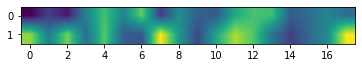

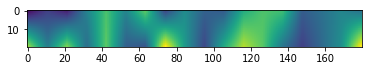

In [ ]:
xn = 18
yn = 2
x = np.linspace(0., 4., xn)
y = np.linspace(0., 1., yn)

xx, yy = np.meshgrid(x, y)

z = np.random.randn(xn, yn)
# f = interpolate.interp2d(x, y, z, kind='cubic')

plt.imshow(z.T, interpolation='bilinear', resample=True)
plt.show()
f = interpolate.interp2d(x, y, z.T, kind='linear')

xnew = np.linspace(0., 4., xn * 10)
ynew = np.linspace(0., 1., yn * 10)
zz = f(xnew, ynew)

# plt.imshow(zz, interpolation='bilinear', resample=True)
plt.imshow(zz)
plt.show()


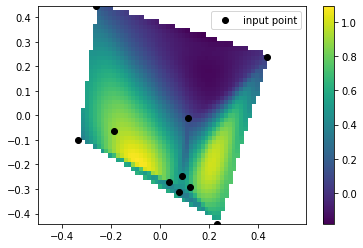

In [ ]:
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib.pyplot as plt

# np.random.seed(0)
x = np.random.random(10) - 0.5
y = np.random.random(10) - 0.5
# z = np.hypot(x, y)
z = np.random.random(10)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
# interp = LinearNDInterpolator(list(zip(x, y)), z)
interp = CloughTocher2DInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

In [ ]:
# add random noise on walls edges
W = nx.Graph()

for i in range(boxsize - 1):
  for j in range(boxsize - 1):
    if Z[i][j] == 0:
      W.add_node(xytoname([i, j]), pos = [i, j])
      if i > 0 and Z[i - 1][j] == 0:
        W.add_edge(xytoname([i, j]), xytoname([i - 1, j]), weight = 1.)
      if j > 0 and Z[i][j - 1] == 0:
        W.add_edge(xytoname([i, j]), xytoname([i, j - 1]), weight = 1.)

posw = dict(W.nodes.data("pos"))
# nx.draw(W, pos=posw, alpha=0.9, node_size=15, width=2)

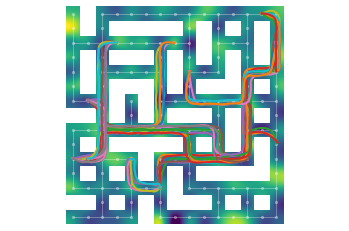

In [ ]:
from scipy.interpolate import interpolate
# from matplotlib.patches import Rectangle
import matplotlib.patches as patches

x = np.linspace(-0.5, boxsize - 0.5, boxsize - 1)
y = np.linspace(-0.5, boxsize - 0.5, boxsize - 1)

xx, yy = np.meshgrid(x, y)
z = np.random.randn(boxsize - 1, boxsize - 1)

interp = interpolate.interp2d(xx, yy, z, kind='linear')
zz = interp(x, y)

fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'xticks': [], 'yticks': []})
axs.set_aspect('equal')
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi = 150, subplot_kw={'xticks': [], 'yticks': []})
axs.imshow(zz, interpolation='spline36', resample=True)

plt.axis("equal")

x = np.arange(-0.5, boxsize - 0.5, 1)
y = np.arange(-0.5, boxsize - 0.5, 1)

nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=1, edge_color='w', node_color='w')

for i in range(boxsize - 1):
  for j in range(boxsize - 1):
    if Z[i][j] == 0:
      rect = patches.Rectangle(xy = (i - 0.5, j - 0.5), width = 1., height=1., color = 'w')
      axs.add_patch(rect)

# nx.draw(W, pos=posw, alpha=0.9, edge_color='k', width=8, node_size=40, node_color='k')

for pts in ds[:10]:
  for xf, yf in pts:
    plt.plot(xf, yf, label = "savgol_filter", linewidth = 2) 

plt.show()